In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

DF=pd.read_csv('train.csv')

DF
DF.shape
DF.describe()

OP=DF['y']


DF.drop(columns=['y'],inplace=True)
DF

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,ak,s,as,c,d,aa,d,q,0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,j,o,t,d,d,aa,h,h,0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,ak,v,r,a,d,aa,g,e,0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,al,r,e,f,d,aa,l,u,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
DF.isnull()
DF.isnull().sum()

cols_to_drop=[]

for col in DF:
    if len((np.unique(DF[col])))==1 or len(np.unique(DF[col]))==DF.shape[0]:
        cols_to_drop.append(col)
    
cols_to_drop

DF.drop(columns=cols_to_drop,inplace=True)
DF
DF.shape

(4209, 364)

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(DF,OP,test_size=0.2,random_state=1)

X_train

X_train.shape

(3367, 364)

In [29]:
cat_cols=[]

for col in DF:
    if DF[col].dtype=='object':
        cat_cols.append(col)
        
len(cat_cols)

cat_cols


['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [ ]:
from sklearn.preprocessing import LabelEncoder

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        
        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

                
        return self.label_encoder.transform(new_data_list)
    


In [30]:
le=LabelEncoderExt()

for col in cat_cols:
    le.fit(X_train[col])
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])
    
X_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
3310,32,4,1,3,4,24,10,22,0,0,...,0,1,0,0,0,0,0,0,0,0
3334,28,21,4,3,4,24,10,12,0,0,...,1,0,0,0,0,0,0,0,0,0
3704,36,1,16,6,4,26,10,25,0,0,...,0,0,0,0,0,0,0,0,0,0
598,41,4,33,3,4,9,9,5,0,0,...,0,0,1,0,0,0,0,0,0,0
2817,14,21,16,3,4,21,4,7,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,8,24,16,6,4,21,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2763,20,2,16,3,4,21,7,2,0,0,...,1,0,0,0,0,0,0,0,0,0
905,1,24,31,4,4,7,10,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3980,44,21,16,1,4,27,10,11,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
X_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
3895,21,14,25,6,4,27,12,2,0,0,...,0,0,0,1,0,0,0,0,0,0
3619,44,21,16,7,4,26,12,5,0,0,...,1,0,0,0,0,0,0,0,0,0
385,44,21,16,7,4,10,9,13,0,0,...,1,0,0,0,0,0,0,0,0,0
1930,20,2,16,3,4,8,8,14,0,0,...,1,0,0,0,0,0,0,0,0,0
1301,21,14,34,6,4,3,7,23,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,20,4,33,1,4,4,12,24,0,0,...,0,0,1,0,0,0,0,0,0,0
3255,41,2,16,3,4,24,12,24,0,0,...,1,0,0,0,0,0,0,0,0,0
3701,44,21,16,3,4,26,10,22,0,0,...,1,0,0,0,0,0,0,0,0,0
3017,20,2,16,3,4,22,4,10,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['Column Name']=X_train.columns

vif


,VIF Factor,Column Name
0,2.758818,X0
1,6.522616,X1
2,20.912206,X2
3,2.892998,X3
4,1.040510,X4
...,...,...
359,inf,X380
360,inf,X382
361,1.536988,X383
362,2.212364,X384


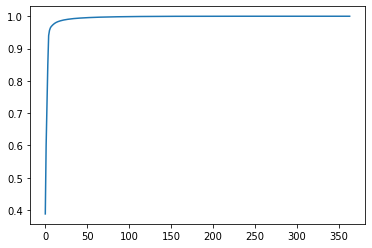

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))


plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [39]:
pca_1=PCA(n_components=50)

X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,50)))

X_test_pca_df=pd.DataFrame(pca_1.transform(X_test))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()

lin_reg.fit(X_train_pca_df,y_train)

y_linreg_pred=lin_reg.predict(X_test_pca_df)

r2_score(y_true=y_test,y_pred=y_linreg_pred)
print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('Test Score:----',lin_reg.score(X_test_pca_df,y_test))

mean_squared_error(y_test,y_linreg_pred)

Train Score:---- 0.5194167146983256
Test Score:---- 0.5378395067216293


75.4951678773853